In [1]:
import subprocess
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
working_dir = '/home/atimms/ngs_data/misc/cherry_sc_org_project_20/cherry_gwas_peaks_1220'
os.chdir(working_dir)

In [3]:
##load data and format
c_bed = 'combined_regions.bed'
c_data = pd.read_table(c_bed, header=None)
##add header
c_data.columns=["chr", "start", "end", "snp_count", "region"]
##add 2 new columns
c_data['size'] = c_data.end - c_data.start
c_data['study'] = c_data['region'].str.split("_").str[0]
c_data.head()


,chr,start,end,snp_count,region,size,study
0,chr1,196237601,197340966,191,fritsche_1,1103365,fritsche
1,chr2,227199605,227222204,38,fritsche_2,22599,fritsche
2,chr3,64719688,64744445,11,fritsche_3,24757,fritsche
3,chr3,99461823,100123954,85,fritsche_4,662131,fritsche
4,chr4,109737910,109764664,2,fritsche_5,26754,fritsche


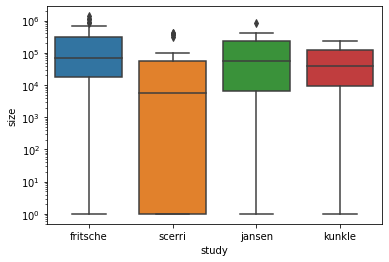

In [4]:
# ax = sns.boxplot(x="study", y="snp_count", data=c_data)
# ax.set_yscale("log")
ax = sns.boxplot(x="study", y="size", data=c_data)
ax.set_yscale("log")

<AxesSubplot:xlabel='study', ylabel='size'>

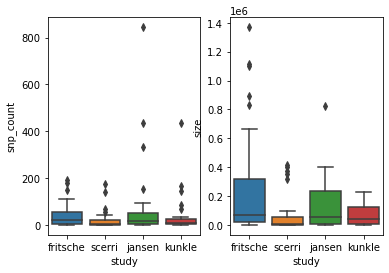

In [5]:
fig, ax=plt.subplots(1,2)

sns.boxplot(x="study", y="snp_count", data=c_data, ax=ax[0])
sns.boxplot(x="study", y="size", data=c_data, ax=ax[1])
#ax[0].set_yscale("log")
#ax[1].set_yscale("log")

In [76]:
int_file = 'combined_regions.summit_peaks.bt_int.bed'
int_data = pd.read_table(int_file, header=None)
##add header
int_data.columns=["chr", "start", "end", "snp_count", "region", "filename", "peak_count"]
##add 3 new columns
##split filename to just peak names
int_data['cc_peaks'] = int_data['filename'].str.split("/").str[-1].str.rsplit(".",3).str[0]

##normalize peak count
int_data['cc_peaks_snp_count'] = int_data.peak_count / int_data.snp_count
int_data['cc_peaks_length'] = int_data.peak_count / (int_data.end - int_data.start)

int_data.head()

,chr,start,end,snp_count,region,filename,peak_count,cc_peaks,cc_peaks_snp_count,cc_peaks_length
0,chr1,196237601,197340966,191,fritsche_1,/active/cherry_t/OrgManuscript_SingleCell_Data...,24,human.Developing_Horizontals,0.125654,0.000022
1,chr1,196237601,197340966,191,fritsche_1,/active/cherry_t/OrgManuscript_SingleCell_Data...,24,human.Ganglion_Precursors,0.125654,0.000022
2,chr1,196237601,197340966,191,fritsche_1,/active/cherry_t/OrgManuscript_SingleCell_Data...,30,human.Developing_Rods,0.157068,0.000027
3,chr1,196237601,197340966,191,fritsche_1,/active/cherry_t/OrgManuscript_SingleCell_Data...,21,human.Developing_Bipolars,0.109948,0.000019
4,chr1,196237601,197340966,191,fritsche_1,/active/cherry_t/OrgManuscript_SingleCell_Data...,17,human.Mature_Rods,0.089005,0.000015


In [77]:
##split peak count column every 54th col i.e. how many peak beds
row_names = int_data.region.unique()
col_names = int_data.cc_peaks.unique()
df_for_hm = pd.DataFrame(int_data.peak_count.values.reshape(-1, 54))
df_for_hm.columns=col_names
df_for_hm['region'] = row_names
df_for_hm = df_for_hm.set_index('region')
df_for_hm.head()

df_for_hm2 = pd.DataFrame(int_data.cc_peaks_snp_count.values.reshape(-1, 54))
df_for_hm2.columns=col_names
df_for_hm2['region'] = row_names
df_for_hm2 = df_for_hm2.set_index('region')
df_for_hm2.head()

df_for_hm3 = pd.DataFrame(int_data.cc_peaks_length.values.reshape(-1, 54))
df_for_hm3.columns=col_names
df_for_hm3['region'] = row_names
df_for_hm3 = df_for_hm3.set_index('region')
df_for_hm3.head()

,human.Developing_Horizontals,human.Ganglion_Precursors,human.Developing_Rods,human.Developing_Bipolars,human.Mature_Rods,human.Mature_Cones,human.Developing_Amacrines,human.Mature_Bipolars,human.Mature_Horizontals,human.Late_Progenitors,...,organoid.Horizontal_Cells,organoid_5wk.Retinal_Ganglion_Cells,organoid_5wk.Amacrine_Horizontal_Precursors,organoid.Bipolar_Photoreceptor_Precursors,organoid_28wk.Horizontal_Cells,organoid_5wk.RPE_Early_Progenitors,organoid_5wk.Bipolar_Photoreceptor_Precursors,organoid.Bipolar_Cells,organoid.RPE_Early_Progenitors,organoid_28wk.Cones
region,,,,,,,,,,,,,,,,,,,,,
fritsche_1,0.000022,0.000022,0.000027,0.000019,0.000015,0.000013,0.000023,0.000024,0.000015,0.000044,...,0.000010,0.000016,0.000011,0.000015,0.000017,0.000017,0.000015,0.000013,0.000017,0.000041
fritsche_2,0.000000,0.000000,0.000044,0.000044,0.000133,0.000221,0.000000,0.000177,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000088,0.000000,0.000133
fritsche_3,0.000040,0.000040,0.000000,0.000000,0.000000,0.000000,0.000040,0.000040,0.000040,0.000000,...,0.000000,0.000040,0.000000,0.000000,0.000040,0.000040,0.000000,0.000000,0.000040,0.000000
fritsche_4,0.000044,0.000030,0.000039,0.000036,0.000051,0.000035,0.000047,0.000050,0.000048,0.000066,...,0.000026,0.000033,0.000009,0.000021,0.000032,0.000027,0.000021,0.000039,0.000027,0.000062
fritsche_5,0.000037,0.000000,0.000000,0.000112,0.000075,0.000037,0.000000,0.000075,0.000000,0.000075,...,0.000000,0.000000,0.000000,0.000037,0.000037,0.000000,0.000037,0.000187,0.000000,0.000037


<AxesSubplot:ylabel='region'>

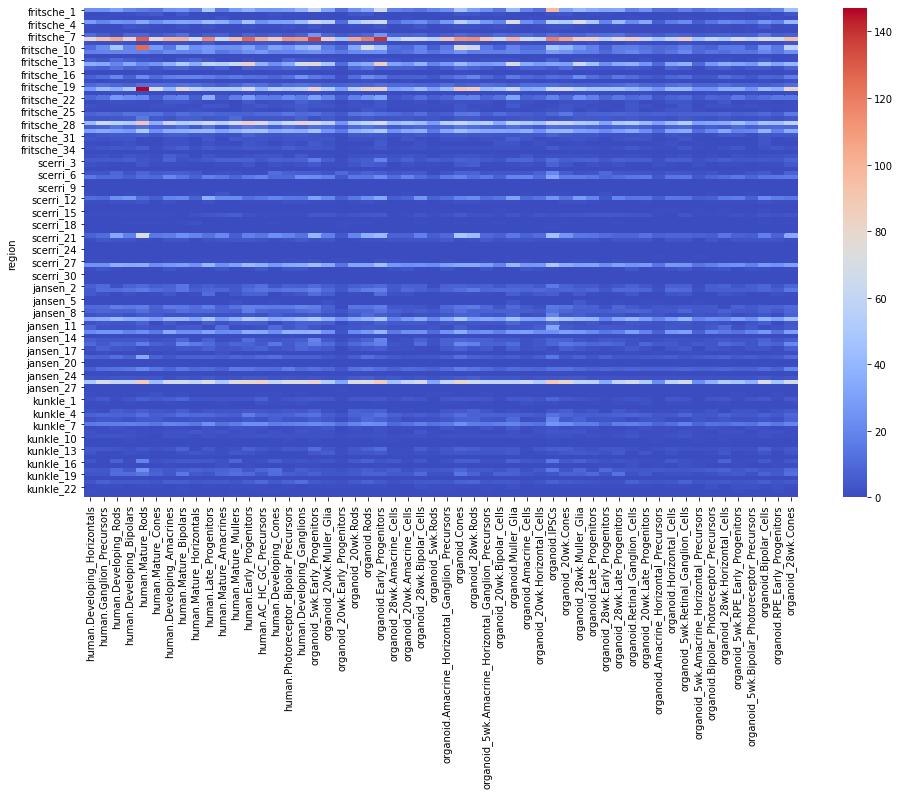

In [82]:
plt.figure(figsize=(16,9))
sns.heatmap(df_for_hm)

In [84]:
df_for_hm.tail()

,human.Developing_Horizontals,human.Ganglion_Precursors,human.Developing_Rods,human.Developing_Bipolars,human.Mature_Rods,human.Mature_Cones,human.Developing_Amacrines,human.Mature_Bipolars,human.Mature_Horizontals,human.Late_Progenitors,...,organoid.Horizontal_Cells,organoid_5wk.Retinal_Ganglion_Cells,organoid_5wk.Amacrine_Horizontal_Precursors,organoid.Bipolar_Photoreceptor_Precursors,organoid_28wk.Horizontal_Cells,organoid_5wk.RPE_Early_Progenitors,organoid_5wk.Bipolar_Photoreceptor_Precursors,organoid.Bipolar_Cells,organoid.RPE_Early_Progenitors,organoid_28wk.Cones
region,,,,,,,,,,,,,,,,,,,,,
kunkle_20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kunkle_21,3,7,5,5,5,3,6,6,4,5,...,4,8,3,4,5,3,4,6,3,5
kunkle_22,0,1,1,0,1,1,0,1,0,1,...,1,1,0,2,0,2,2,1,2,1
kunkle_23,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
kunkle_24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
